<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Adversarial_Examples_Are_Not_Bugs%2C_They_Are_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adversarial Examples Are Not Bugs, They Are Features**

논문 링크: https://arxiv.org/abs/1905.02175

기존의 adversarial example을 주제로 다루는 논문들은 이것을 일종의 'bug'처럼 다루고 이 'bug'을 어떻게 해결할 수 있을지에 대해 연구를 했다. 반면 본 논문은 제목과 같이 **adversarial example을 'bug'가 아닌 일종의 'feature'인 non-robust feature라고 주장**함으로써 바라봄으로써 새로운 시각을 제공한다. robust feature에 민감한 인간들과 달리 model들은 non-robust feature에도 충분하게 민감하기 때문에 adversarial example에서 충분히 오분류를 잃으킬 수 있다는 것이다.

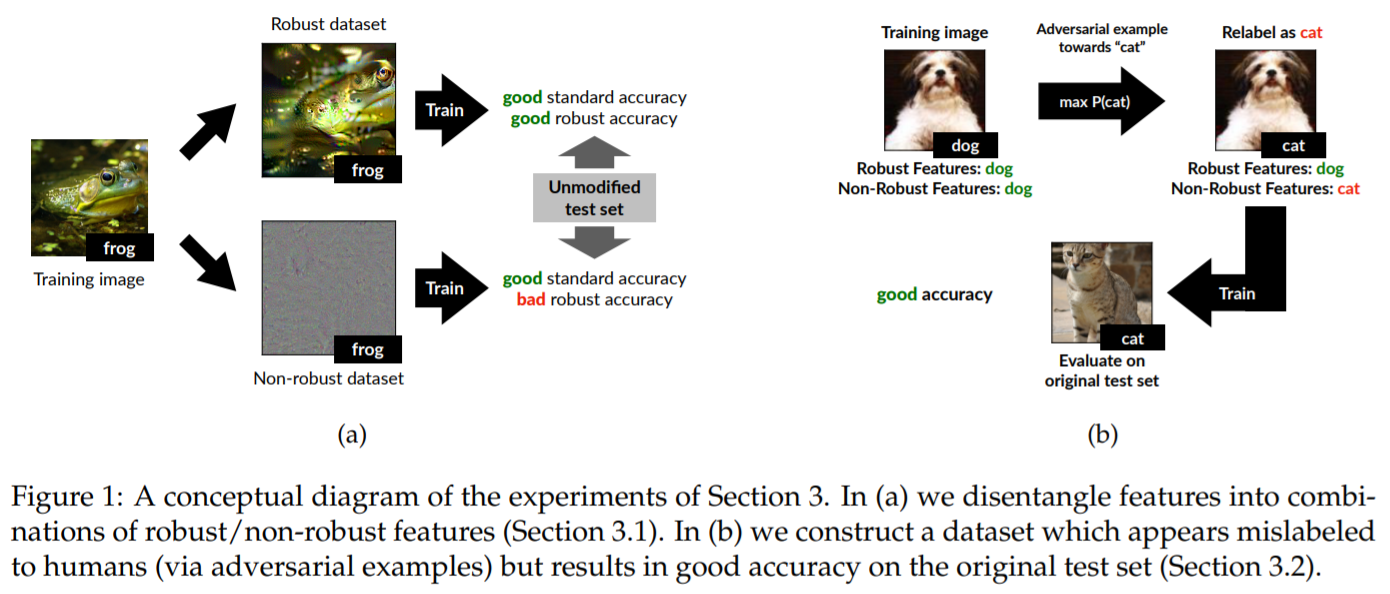

위의 그림 Figure 1에서 오른쪽 부분 (b)를 보면 원래 개의 이미지에서 non-robust feature를 cat으로 바꾸는 adversarial example을 만들고, 이를 적용시킴과 동시에 label을 cat으로 바꾼다. 이처럼 cat의 경우도 non-robust feature를 dog으로 바꾸고 label을 dog으로 바꾼다. 그리고 이를 학습시킨다면 어떻게 될까? 이렇게 되면 model은 non-robust feature에 초점을 두고 판단을 하게 된다. 여기서 재미있는 점은 원래의 데이터에 대해서도 분류를 잘하게 된다는 것이다. 아래의 cat을 보면 original cat의 이미지인데 cat으로 잘 분류를 하는 것을 알 수 있다.

이것이 의미하는 것이 과연 무엇일까? 바로 사람눈에게는 아무렇지 않아 보이는 non-robust feature가 model에게는 중요한 feature라는 것이다. 즉, adversarial example이 model의 이러한 특징때문에 저런 현상이 일어난다는 것이다.

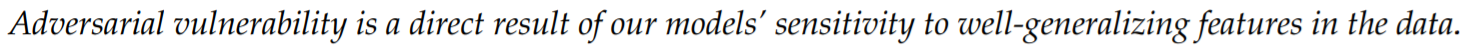

NN가 data에 존재하는 어떤 잘 일반화가 된 feature에 대해서 잘 학습을 하기 때문에 이런 feature에 민감하게 되고, 이런 feature에 민감하기 때문에 adversarial example이 존재한다

adversarial transferability의 경우에도 위에서 말한 것을 이해했다면 쉽게 납득할 수 있다. adversarial transferability의 특징은 model에서 다른 model로 adversarial example이 전이(transfer)가 되는 것이다. 일반적으로 두 model이 구조 등이 다르더라도 같은 이미지에 대해 학습하기 때문에 이는 곧 비슷한 non-robust feature를 학습하는 것이다. 따라서 non-robust feature를 변경하는 adversarial example은 충분히 공통적으로 여러 모델에 적용이 될 수 있다.

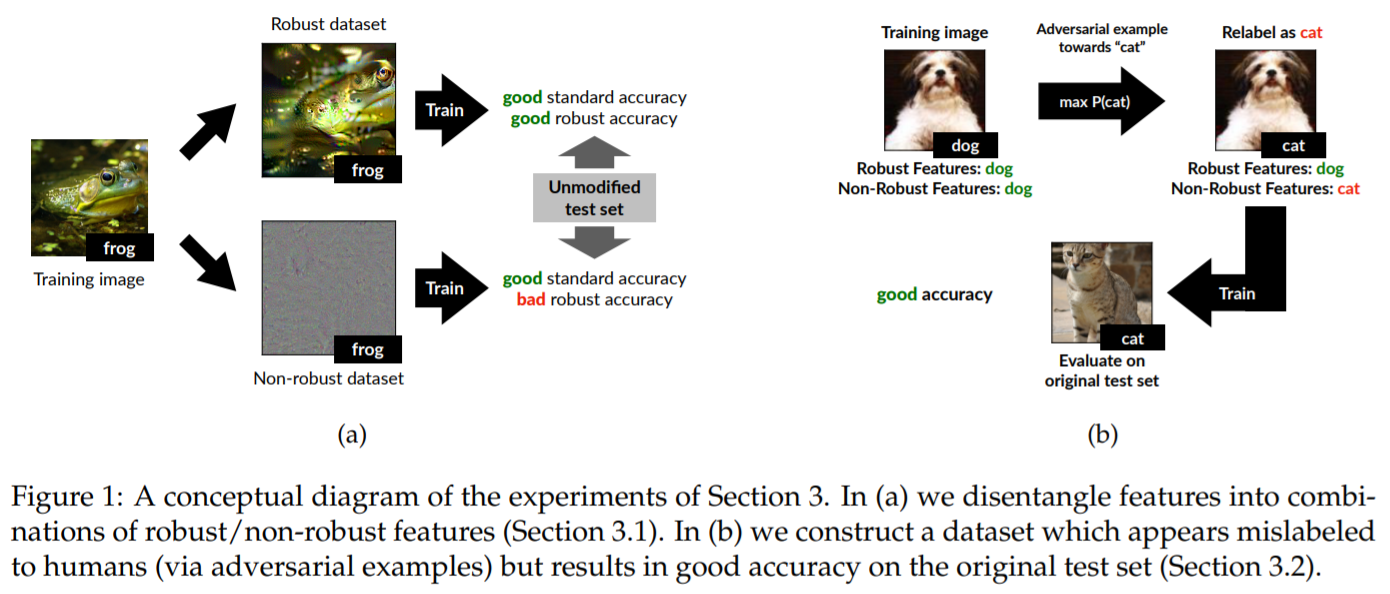

위의 그림 Figure 1에서 (a)를 보면 frog라는 이미지에 대해 Robust feature와 non-robust feature를 뽑고 train을 하였는데, 둘다 일반적인 dataset에 대해서는 좋은 accuracy를 보였줬지만, 후자의 경우 adversarial attack에 약한 모습을 보인다.

## **The Robust Features Model**

예시를 들어보겠다. 개와 고양이를 분류하는 model을 만들어 학습한다고 쳤을때, 각 뉴런들은 input 이미지의 특정 부분에 해당하는 어떠한 feature을 보게 된다.

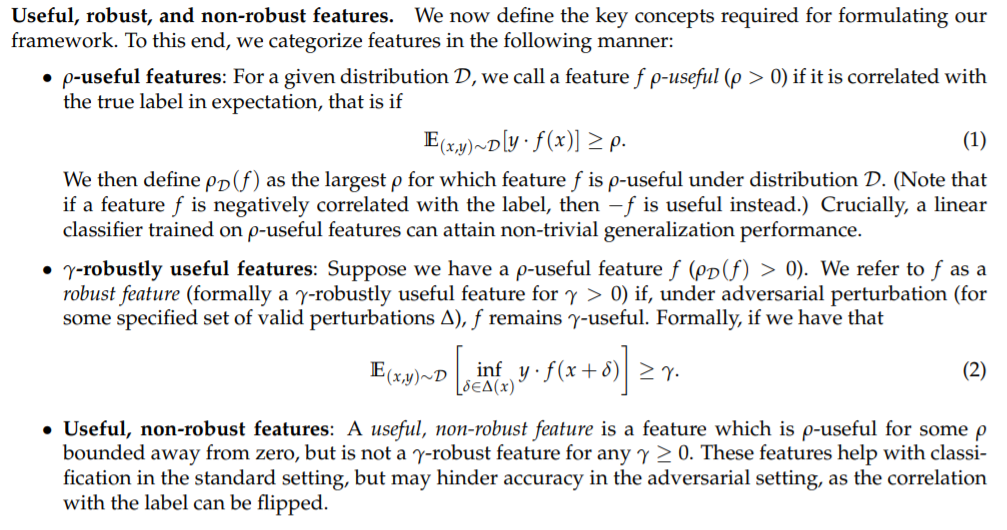

이때, p는 useful feature 즉, 어떤 feature가 유용한가에 대한 지표라고 보면 된다. 위에서 들은 예시로 따지면 강아지의 경우 주둥이가 더욱 튀어나와있으므로 +값을 가지도록 activation이 된다. 즉 그때 activation이 되는값이 p보다 큰지를 물어보는 것이다. 특정 label이 negatively한 경우 절대값인 -f를 보게 된다. 강아지가 +3, 고양이가 -3이 나올때 이 feature는 즉 3만큼 유용한 feature인 것이다. 반면 다리 개수의 경우 강아지나 고양이 둘다 4개이기 때문에 값이 0.1 등으로 작게 나온다. 즉 이때는 0.1 useful(도움이 별로 안되는) feature인 것이다. 이런식으로 특정 feature가 얼마나 유용한지 확인하는  것이 p-useful features인 것이다.

그리고 위와 같은 feature를 또 robust feature과 non-robust feature로 구분할 수 있다. 어떠한 펄털베이션이 섞였을때의 값의 inf(하한선) = adversarial example이 섞였을때 그 값이 여전히 r보다 크거나 같을때의 faeture = adversarial example이 섞여도 민감하게 반응하지 않음

반면 adversarial example을 섞었을때 feature에 대한 값이 많이 변경이 되어 r이 0보다 작아졌으면 그 값은 non-robust feature라고 볼 수 있다.

모델은 일반적인 classification 모델을 사용, standard training과 robust train(= adversarial training)을 사용하는데 robust train의 경우 일반적인 loss function을 사용하지 않고 adversarial loss function을 사용한다.

## Finding Robust (and Non-Robust) Features

그러면 과연 "robustified" dataset은 어떻게 만들까?